In [11]:
from PIL import Image
import imageio 
import numpy as np
from sklearn import  metrics
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#extracting pictures from a folder
#resizing them
#creating an array of grayscale values of every picture
imageName = []
for i in range(10):
    for j in range(50):
        imageName.append(str(i)+'_'+str(j)+'.png')
X=[]
for picture in imageName: 
    img = Image.open(r'C:\Anaconda\SVM_DIGIT_RECOGNITION\raw\\'+str(picture))
    img3 = img.resize((7, 7), Image.ANTIALIAS)
    img3.save('C:\Anaconda\SVM_DIGIT_RECOGNITION\cut\inter\\'+str(picture))
    img4= imageio.imread(r'C:\Anaconda\SVM_DIGIT_RECOGNITION\cut\inter\\'+str(picture))
    X.append(img4)
X=np.array(X)

In [13]:
#reshaping the array, so every picture becomes a vector of grayscale values
X=X.reshape((500,49))

In [14]:
#creating an array of labels (note: pictures are sorted in ascending order)
y=np.array([[i]*50 for i in range(10)]).reshape(500,)

In [15]:
#splitting into train and test, preserving the percentage of samples for each class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True, stratify=y)

In [16]:
# training LR model, tuning its hyperparameters, performimg validation
classifier = LogisticRegression(max_iter=10000)
params_grid = {"C": np.logspace(-4,4,7),
               "solver":['newton-cg','sag', 'saga'],
              "multi_class":["ovr","multinomial"]}
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = 42)
grid_clf = GridSearchCV(classifier, params_grid, cv=skf.split(X_train, y_train))
grid_clf.fit(X_train,y_train)
print (grid_clf.best_score_, grid_clf.best_params_)


0.98 {'C': 0.0001, 'multi_class': 'multinomial', 'solver': 'sag'}


[[10  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  1  9  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  9  1]
 [ 0  0  0  0  0  0  0  0  0 10]]


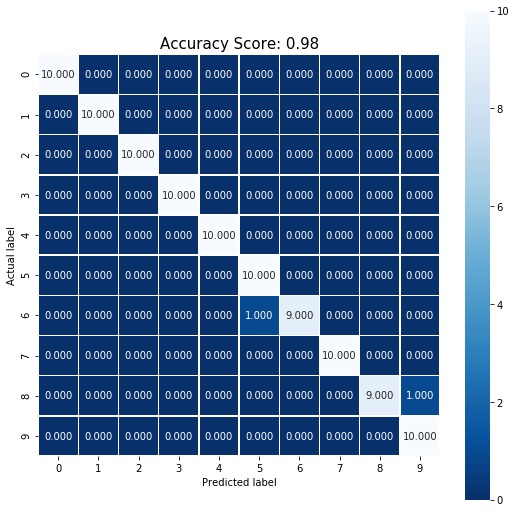

In [18]:
#score on test set
score = grid_clf.score(X_test, y_test)

#visualizing confusion matrix
cm = metrics.confusion_matrix(y_test, grid_clf.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);